In [ ]:
!pip install langgraph

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [32]:
class AgentType(TypedDict):
    number1: int
    number2: int
    operator1: str
    result1: int

    number3: int
    number4: int
    operator2: str
    result2: int



In [33]:
def adder(state: AgentType) -> AgentType:
  """This is a function that adds two numbers"""
  state["result1"] = state["number1"] + state["number2"]
  return state

def subtractor(state: AgentType) -> AgentType:
  """This is a function that subtracts two numbers"""
  state["result1"] = state["number1"] - state["number2"]
  return state

def decider(state: AgentType) -> AgentType:
  """This function decides which operation to use"""
  if state["operator1"] == "+":
    return "addition_operation"
  elif state["operator1"] == "-":
    return "subtraction_operation"


In [34]:
def adder2(state: AgentType) -> AgentType:
  """This is a function that adds two numbers"""
  state["result2"] = state["number3"] + state["number4"]
  return state

def subtractor2(state: AgentType) -> AgentType:
  """This is a function that subtracts two numbers"""
  state["result2"] = state["number3"] - state["number4"]
  return state

def decider2(state: AgentType) -> AgentType:
  """This function decides which operation to use"""
  if state["operator2"] == "+":
    return "addition_operation"
  elif state["operator2"] == "-":
    return "subtraction_operation"

In [35]:
graph = StateGraph(AgentType)
graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("decide_node1", lambda state: state)

#Adding edges
graph.add_edge(START,"decide_node1")
#Conditional Edge 1
graph.add_conditional_edges(
    "decide_node1",
    decider,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"sub_node"
    }
)

graph.add_node("decide_node2", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("sub_node2", subtractor2)

#Adding edges
graph.add_edge("add_node","decide_node2")
graph.add_edge("sub_node","decide_node2")

#Conditional Edge 2
graph.add_conditional_edges(
    "decide_node2",
    decider,
    {
        "addition_operation":"add_node2",
        "subtraction_operation":"sub_node2"
    }
)

graph.add_edge("add_node2",END)
graph.add_edge("sub_node2",END)

app = graph.compile()

In [7]:
from IPython.display import Image, display

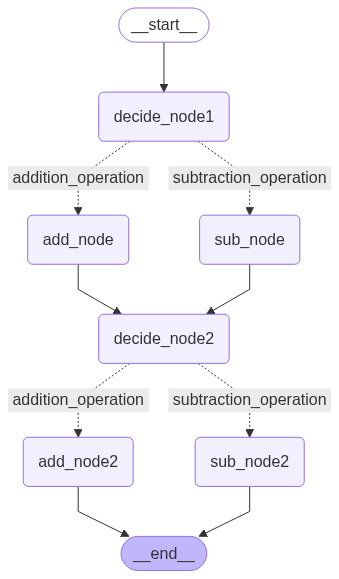

In [28]:
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
result = app.invoke({"number1":1,"number2":3, "number3":5, "number4":9, "operator1":"+", "operator2":"-"})

In [38]:
result["result1"]

4